In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [2]:
# Part (a): Generate the dataset
def generate_dataset(n=200, theta_0=3, theta_1=2, theta_2=1, theta_3=1, noise_variance=0.05):
    np.random.seed(42)  
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    eta = np.random.normal(0, np.sqrt(noise_variance), n)
    
    # True model: y = theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x1 * x2 + eta
    y = theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x1 * x2 + eta
    
    return pd.DataFrame({"x1": x1, "x2": x2, "y": y})

data = generate_dataset()

In [3]:
# Part (b): Estimate parameters (linear model)
def estimate_linear_model(data):
    X = data[["x1", "x2"]].values
    y = data["y"].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    return model, model.coef_, model.intercept_

model_linear, coef_linear, intercept_linear = estimate_linear_model(data)

In [4]:
# Part (c): Compute MSE for the linear model
def compute_mse(data, model, features):
    X = data[features].values
    y = data["y"].values
    y_pred = model.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    return mse

mse_linear = compute_mse(data, model_linear, features=["x1", "x2"])

In [5]:
# Part (d): Apply transformation and form new dataset
def transform_data(data):
    data["x1x2"] = data["x1"] * data["x2"]
    return data

data_transformed = transform_data(data.copy())

In [6]:
# Part (e): Estimate parameters in transformed space
def estimate_transformed_model(data):
    X = data[["x1", "x2", "x1x2"]].values
    y = data["y"].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    return model, model.coef_, model.intercept_

model_transformed, coef_transformed, intercept_transformed = estimate_transformed_model(data_transformed)

In [7]:
# Part (f): Compute MSE for the transformed model
mse_transformed = compute_mse(data_transformed, model_transformed, features=["x1", "x2", "x1x2"])

In [8]:
# Part (g): Results summary
def summarize_results():
    print("--- Linear Model ---")
    print(f"Coefficients: {coef_linear}")
    print(f"Intercept: {intercept_linear}")
    print(f"MSE: {mse_linear}\n")
    
    print("--- Transformed Model ---")
    print(f"Coefficients: {coef_transformed}")
    print(f"Intercept: {intercept_transformed}")
    print(f"MSE: {mse_transformed}\n")

summarize_results()

--- Linear Model ---
Coefficients: [1.97356907 0.87899717]
Intercept: 2.98975350885076
MSE: 0.16416404449453237

--- Transformed Model ---
Coefficients: [2.00110223 0.97985638 1.00015645]
Intercept: 2.9992791758401327
MSE: 0.04840319134214337



## Comments on c and f

#### Linear Model
- **Coefficients**: `[1.97356907, 0.87899717]`
- **Intercept**: `2.98975350885076`
- **MSE**: `0.16416404449453237`

#### Transformed Model
- **Coefficients**: `[2.00110223, 0.97985638, 1.00015645]`
- **Intercept**: `2.9992791758401327`
- **MSE**: `0.04840319134214337`

---

1. **Linear Model**:
   - The linear model estimates coefficients for `x1` and `x2` but ignores the interaction term `x1 * x2`.
   - As a result, it cannot fully represent the underlying true model, leading to a higher MSE.

2. **Transformed Model**:
   - The transformed model captures the interaction term `x1 * x2`, enabling it to align more closely with the true data-generating process.
   - Its coefficients (`[2.00110223, 0.97985638, 1.00015645]`) are very close to the true parameters (`theta_1 = 2, theta_2 = 1, theta_3 = 1`).
   - The significantly lower MSE (`0.04840319134214337`) reflects its improved fit to the data.

### 2.9

In [9]:
# (a) Generate the dataset
def generate_dataset(n=2000):
    np.random.seed(42)
    x1 = np.random.uniform(-2, 2, n)
    x2 = np.random.uniform(-2, 2, n)
    y = np.where(x2**2 - x1**2 > 0, 1, -1)  # Class +1 if positive, -1 otherwise
    return pd.DataFrame({"x1": x1, "x2": x2, "y": y})

data = generate_dataset()

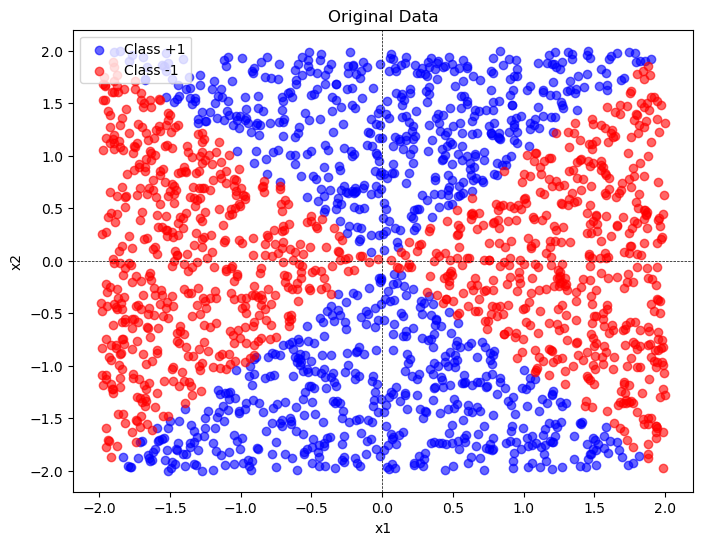

In [10]:
# Plot the dataset
def plot_data(data, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["x1"][data["y"] == 1], data["x2"][data["y"] == 1], c='blue', label='Class +1', alpha=0.6)
    plt.scatter(data["x1"][data["y"] == -1], data["x2"][data["y"] == -1], c='red', label='Class -1', alpha=0.6)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

plot_data(data, "Original Data")

#### Original Data
The plot represents the original dataset. The two classes, labeled as Class +1 (blue) and Class -1 (red), are not linearly separable in this feature space (\(x_1\), \(x_2\)). 

This lack of linear separability necessitates a transformation to map the data into a higher-dimensional space, where a linear decision boundary can effectively separate the two classes.

In [11]:
# (b) Apply transformation
def transform_data(data):
    data_transformed = data.copy()
    data_transformed["x1_sq"] = data["x1"]**2
    data_transformed["x2_sq"] = data["x2"]**2
    return data_transformed[["x1_sq", "x2_sq", "y"]]

data_transformed = transform_data(data)

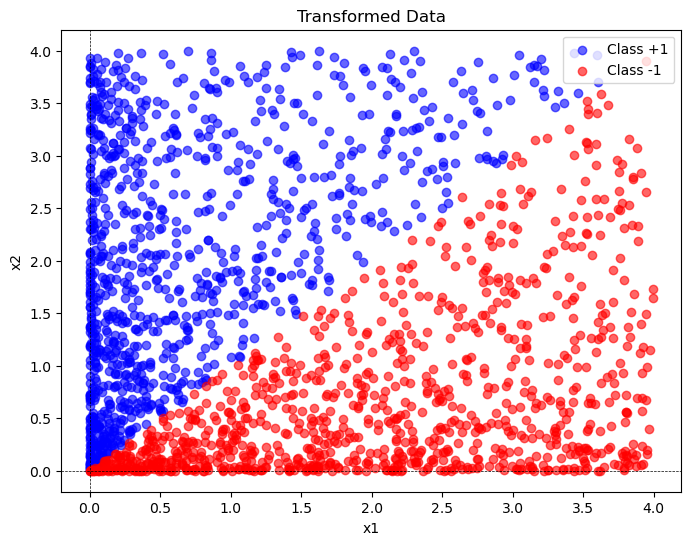

In [12]:
# (c) Plot the transformed dataset
plot_data(data_transformed.rename(columns={"x1_sq": "x1", "x2_sq": "x2"}), "Transformed Data")

#### Transformed Data
After applying the transformation \(φ(x) = [x_1^2, x_2^2]\), the data becomes linearly separable, as seen in the transformed data plot below. This transformation aligns the data to match the decision boundary's quadratic nature, allowing the linear model to classify the data effectively.

In [15]:
# (d) Fit a linear model
X_transformed = data_transformed[["x1_sq", "x2_sq"]].values
y_transformed = data_transformed["y"].values

model = LogisticRegression()
model.fit(X_transformed, y_transformed)

# Print model parameters
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [[-7.52024616  7.4633171 ]]
Model intercept: [0.10871901]


### Model Parameters for the Transformed Space
- **Coefficients**: \([-7.52024616, 7.4633171]\)
- **Intercept**: \([0.10871901]\)

### Comments
The model parameters define the linear decision boundary in the transformed space. The transformation reveals the true structure of the data, enabling the linear classifier to achieve optimal performance.